<a href="https://colab.research.google.com/github/aksweb/Feynn-Labs-Project-1/blob/main/FeynnLabsProject01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cit= pd.read_csv('/content/drive/MyDrive/feynn_p1/Indian_cities.csv')
road_len= pd.read_csv('/content/drive/MyDrive/feynn_p1/ROAD LENGTH.csv')
rev_mot_des=pd.read_csv('/content/drive/MyDrive/feynn_p1/REVENUE_MOTOR_DIESAL.csv')
road_det=pd.read_csv('/content/drive/MyDrive/feynn_p1/road-det.csv')

# len(df1['state_name'].unique()), df1['state_name'].unique()

##df1: city_dataset preprocessing

In [4]:
s_columns=['name_of_city', 'state_name', 'population_total', '0-6_population_total', 'sex_ratio', 'effective_literacy_rate_total']

df1=cit[s_columns]

def convert_to_capitalized(text):
    # Check if the text is not empty
    if text:
        # Convert the first character to uppercase and the rest to lowercase
        return text[0].upper() + text[1:].lower()
    else:
        return text  # Return empty string if input is empty
df1['state_name'] = df1['state_name'].apply(convert_to_capitalized)
# df3['state_name'] = df3['state_name'].apply(convert_to_capitalized)
# Clean the 'ColumnName' by stripping extra spaces at the end
# df1['state_name'] = df1['state_name'].str.strip()

#Removing Delhi from the dataset
df1 = df1[df1['state_name'] != 'Jharkhand']
df1 = df1[df1['state_name'] != 'Nct of delhi']
df1 = df1[df1['state_name'] != 'Puducherry']

# Clean the 'ColumnName' by stripping extra spaces at the end
df1['state_name'] = df1['state_name'].str.strip()
df1['name_of_city'] = df1['name_of_city'].str.strip()


df1.head()

<ipython-input-4-c694edafce89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['state_name'] = df1['state_name'].apply(convert_to_capitalized)


,name_of_city,state_name,population_total,0-6_population_total,sex_ratio,effective_literacy_rate_total
0,Abohar,Punjab,145238,15870,890,79.86
1,Achalpur,Maharashtra,112293,11810,928,91.99
2,Adilabad,Andhra pradesh,117388,13103,982,80.51
4,Adoni,Andhra pradesh,166537,18406,1013,68.38
5,Agartala,Tripura,399688,33635,1002,93.88


In [5]:
len(df1['state_name'].unique()), df1['state_name'].unique()

(26,
 array(['Punjab', 'Maharashtra', 'Andhra pradesh', 'Tripura',
        'Uttar pradesh', 'Gujarat', 'Mizoram', 'Rajasthan', 'Tamil nadu',
        'Kerala', 'Haryana', 'Chhattisgarh', 'Jammu & kashmir', 'Bihar',
        'West bengal', 'Karnataka', 'Orissa', 'Madhya pradesh',
        'Chandigarh', 'Uttarakhand', 'Assam', 'Nagaland', 'Manipur',
        'Andaman & nicobar islands', 'Meghalaya', 'Himachal pradesh'],
       dtype=object))

## Processing dataset 2

In [6]:
df3=road_det
df3.rename(columns={'Name of the States': 'state_name'}, inplace=True)
# df3 = df3[df3['state_name'] != NaN]


# removing nan
# Define the range of rows to remove (27 to 33, inclusive)
start_row = 27  # Starting row (inclusive)
end_row = 33    # Ending row (inclusive)

# Use DataFrame slicing to remove the rows
df3 = df3.iloc[:start_row].append(df3.iloc[end_row + 1:], ignore_index=True)
df3['state_name'] = df3['state_name'].str.strip()

df3

<ipython-input-6-f3088ea7c41f>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.iloc[:start_row].append(df3.iloc[end_row + 1:], ignore_index=True)


,state_name,state_weight,National Highways,State Highways,District Roads,Rural Roads,Urban roads,Project Roads,Total road Length,Total Area,Road Density,Road Density per 1000 Sq. Km - National Highways,Road Density per 1000 Sq. Km - State Highways,Road Density per 1000 Sq. Km - District Roads,Road Density per 1000 Sq. Km - Rural Roads,Road Density per 1000 Sq. Km - Urban roads,Road Density per 1000 Sq. Km - Project Roads
0,Andhra Pradesh,8,10709.0,15649.0,58083.0,180833.0,22724.0,28907.0,316906.0,275045.0,1152.20,38.9,56.9,211.0,657.47,82.62,105.10
1,Assam,19,3909.0,2530.0,6093.0,372510.0,6268.0,7813.0,399122.0,78438.0,5088.38,49.8,32.3,78.0,4749.11,79.90,99.60
2,Bihar,25,5358.0,4006.0,12797.0,259507.0,14308.0,2230.0,298205.0,94163.0,3166.91,56.9,42.5,136.0,2755.93,151.95,23.68
3,Chhattisgarh,11,3606.0,4176.0,12221.0,56575.0,12824.0,15672.0,105074.0,135192.0,777.22,26.7,30.9,90.0,418.48,94.86,115.92
4,Gujarat,3,6635.0,16746.0,31262.0,132467.0,30920.0,31343.0,249373.0,196244.0,1270.73,33.8,85.3,159.0,675.01,157.56,159.71
5,Haryana,5,3166.0,1602.0,22051.0,7027.0,14853.0,1594.0,50292.0,44212.0,1137.53,71.6,36.2,499.0,158.93,335.95,36.06
6,Himachal Pradesh,16,2607.0,827.0,4277.0,53033.0,4706.0,7781.0,73230.0,55673.0,1315.37,46.8,14.9,77.0,952.57,84.53,139.77
7,Jammu & Kashmir,14,2423.0,310.0,19695.0,75684.0,2096.0,19826.0,120034.0,222236.0,540.12,10.9,1.4,89.0,340.56,9.43,89.21
8,Jharkhand,17,3367.0,1232.0,10969.0,44317.0,7433.0,13928.0,81245.0,79716.0,1019.18,42.2,15.5,138.0,555.93,93.24,174.73
9,Karnataka,2,7335.0,19473.0,49555.0,220130.0,41396.0,20413.0,358300.0,191791.0,1868.18,38.2,101.5,258.0,1147.76,215.84,106.43


In [7]:
len(df3['state_name']), df3['state_name'].unique()

(27,
 array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
        'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
        'Rajasthan', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
        'Uttarakhand', 'West Bengal', 'Andaman & nicobar islands',
        'Chandigarh'], dtype=object))

Installing Fuzzywuzzy for easy data matching

In [8]:
!pip install fuzzywuzzy


In [9]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Function to perform fuzzy string matching and find the best match
def fuzzy_match_state_name(state_name, choices):
    match, score = process.extractOne(state_name, choices)
    return match if score >= 80 else None

# Get unique state names from both DataFrames
state_names_df1 = df1['state_name'].unique()
state_names_df3 = df3['state_name'].unique()

# Create a mapping of state names from df1 to df2 using fuzzy matching
state_mapping = {state1: fuzzy_match_state_name(state1, state_names_df3) for state1 in state_names_df1}

# Map state names from df1 to df2
df1['state_name_mapped'] = df1['state_name'].map(state_mapping)

# Merge df2 into df1 based on the mapped 'state_name' using a left join
merged_df = df1.merge(df3, left_on='state_name_mapped', right_on='state_name', how='left')

# Drop the 'state_name_mapped' column
merged_df.drop(columns=['state_name_mapped'], inplace=True)
merged_df.drop(columns=['state_name_y'], inplace=True)
merged_df.rename(columns={'state_name_x': 'state_name'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
merged_df.head()

,name_of_city,state_name,population_total,0-6_population_total,sex_ratio,effective_literacy_rate_total,state_weight,National Highways,State Highways,District Roads,...,Project Roads,Total road Length,Total Area,Road Density,Road Density per 1000 Sq. Km - National Highways,Road Density per 1000 Sq. Km - State Highways,Road Density per 1000 Sq. Km - District Roads,Road Density per 1000 Sq. Km - Rural Roads,Road Density per 1000 Sq. Km - Urban roads,Road Density per 1000 Sq. Km - Project Roads
0,Abohar,Punjab,145238,15870,890,79.86,6,3274.0,1133.0,6808.0,...,13195.0,147862.0,50362.0,2935.98,65.0,22.5,135.0,2076.26,375.02,262.00
1,Achalpur,Maharashtra,112293,11810,928,91.99,1,17757.0,32005.0,108419.0,...,21993.0,636887.0,307713.0,2069.74,57.7,104.0,352.0,1385.47,98.75,71.47
2,Adilabad,Andhra pradesh,117388,13103,982,80.51,8,10709.0,15649.0,58083.0,...,28907.0,316906.0,275045.0,1152.20,38.9,56.9,211.0,657.47,82.62,105.10
3,Adoni,Andhra pradesh,166537,18406,1013,68.38,8,10709.0,15649.0,58083.0,...,28907.0,316906.0,275045.0,1152.20,38.9,56.9,211.0,657.47,82.62,105.10
4,Agartala,Tripura,399688,33635,1002,93.88,23,854.0,1057.0,461.0,...,1439.0,45120.0,10486.0,4302.87,81.4,100.8,44.0,3837.12,102.36,137.20


In [11]:
df2=merged_df
df2.to_csv('final_data.csv', index=False)

###Encoding the non numerical columns

In [12]:
import pandas as pd

# Load your DataFrame (replace 'data.csv' with your data file)
df = pd.read_csv('final_data.csv')

# Check the data types of each column
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Print the non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)


Non-Numeric Columns:
Index(['name_of_city', 'state_name'], dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression  # Example model, replace with your choice
from sklearn.metrics import mean_squared_error  # Example evaluation metric, replace as needed

# Load your DataFrame (replace 'final_data.csv' with your data file)
df = pd.read_csv('final_data.csv')

# Remove leading and trailing spaces from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Separate features (X) and target variable (y)
X = df.drop(columns=['state_weight','name_of_city'])  # Exclude the target variable
y = df['state_weight']

In [14]:
y.head()

0     6
1     1
2     8
3     8
4    23
Name: state_weight, dtype: int64

In [15]:

# Encode categorical columns ('state_name' in this case) using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
state_name_encoded = encoder.fit_transform(df[['state_name']])
state_name_encoded_df = pd.DataFrame(state_name_encoded, columns=encoder.get_feature_names_out(['state_name']))
state_name_encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,state_name_Andhra pradesh,state_name_Assam,state_name_Bihar,state_name_Chandigarh,state_name_Chhattisgarh,state_name_Gujarat,state_name_Haryana,state_name_Himachal pradesh,state_name_Jammu & kashmir,state_name_Karnataka,...,state_name_Mizoram,state_name_Nagaland,state_name_Orissa,state_name_Punjab,state_name_Rajasthan,state_name_Tamil nadu,state_name_Tripura,state_name_Uttar pradesh,state_name_Uttarakhand,state_name_West bengal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# Concatenate the one-hot encoded 'state_name' with other features
X = pd.concat([X, state_name_encoded_df], axis=1)
X.drop(columns=['state_name'], inplace=True)

X.head()

,population_total,0-6_population_total,sex_ratio,effective_literacy_rate_total,National Highways,State Highways,District Roads,Rural Roads,Urban roads,Project Roads,...,state_name_Mizoram,state_name_Nagaland,state_name_Orissa,state_name_Punjab,state_name_Rajasthan,state_name_Tamil nadu,state_name_Tripura,state_name_Uttar pradesh,state_name_Uttarakhand,state_name_West bengal
0,145238,15870,890,79.86,3274.0,1133.0,6808.0,104565.0,18887.0,13195.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,112293,11810,928,91.99,17757.0,32005.0,108419.0,426327.0,30386.0,21993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,117388,13103,982,80.51,10709.0,15649.0,58083.0,180833.0,22724.0,28907.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,166537,18406,1013,68.38,10709.0,15649.0,58083.0,180833.0,22724.0,28907.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,399688,33635,1002,93.88,854.0,1057.0,461.0,40236.0,1073.0,1439.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###Train-test split

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Adding custom scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a copy of your original DataFrame
X_train_custom_scaled = X_train.copy()
X_test_custom_scaled = X_test.copy()

# Specify the columns you want to give more weight
columns_to_scale = ['0-6_population_total', 'effective_literacy_rate_total']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler(feature_range=(5, 10))

# Fit and transform the training data
X_train_custom_scaled[columns_to_scale] = scaler.fit_transform(X_train_custom_scaled[columns_to_scale])

# Transform the test data using the same scaler
X_test_custom_scaled[columns_to_scale] = scaler.transform(X_test_custom_scaled[columns_to_scale])



#Selecting the model with Lowest Mean Squared Error

### Linear Regression : Mean Squared Error: 0.3237447701611982


In [19]:
model = LinearRegression()

# Train
model.fit(X_train_custom_scaled, y_train)

y_pred = model.predict(X_test_custom_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3526512384811141


###Using Ridge Lasso Regression: Mean Squared Error: 8.008902311029392


In [20]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_custom_scaled, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_custom_scaled, y_train)

y_pred =lasso_model.predict(X_test_custom_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.979988748326028


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+02, tolerance: 1.274e+00
  model = cd_fast.enet_coordinate_descent(


##Using Decision Tree & RandomForest : Mean Squared Error: 0.07004042553191495





In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_custom_scaled, y_train)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_custom_scaled, y_train)

# predictions
y_pred =rf_model.predict(X_test_custom_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.03444000000000004


### Using Support vector Regression: Mean Squared Error: 0.20459407050178582

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_custom_scaled, y_train)

y_pred =svr_model.predict(X_test_custom_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

###BEST: Using GradientBoostingRegressor : Mean Squared Error: 0.008281055716779595


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01)
gb_model.fit(X_train_custom_scaled, y_train)


# Make predictions on the test set
y_pred =gb_model.predict(X_test_custom_scaled)

# Evaluate the model using Mean Squared Error (MSE) as an example
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.283354149523666


##Feature Importance

In [23]:
y_pred

array([11.9846838 , 11.9846838 , 19.4509989 ,  8.80126826, 19.4299747 ,
       12.47489196,  7.72106386,  9.2588698 ,  4.43361716,  8.80126826,
       19.4299747 , 11.7767804 , 19.4299747 , 12.26666786,  4.43361716,
       12.47489196,  4.43361716, 12.47489196,  5.52253879, 11.9846838 ,
       10.31706522,  4.43361716,  4.43361716,  7.72106386,  4.8864563 ,
        6.2689586 ,  9.2588698 , 11.7767804 , 19.4299747 ,  7.73212128,
        9.2588698 ,  9.63027463,  4.43361716, 13.56205466,  7.72106386,
        4.8864563 ,  5.52253879,  4.8864563 ,  4.8864563 ,  7.73212128,
        5.52253879,  4.8864563 ,  5.52253879, 19.4299747 ,  7.72106386,
        8.80126826, 10.31706522,  8.80126826, 12.47489196, 11.7767804 ,
        5.52253879,  8.80126826, 11.9846838 , 11.7767804 ,  7.72106386,
       11.7767804 ,  9.2588698 ,  6.2689586 , 13.42101905,  4.8864563 ,
        5.52253879, 12.47489196,  5.52253879,  8.80126826, 10.31706522,
       13.56205466, 11.7767804 ,  6.2689586 ,  5.52253879, 11.98

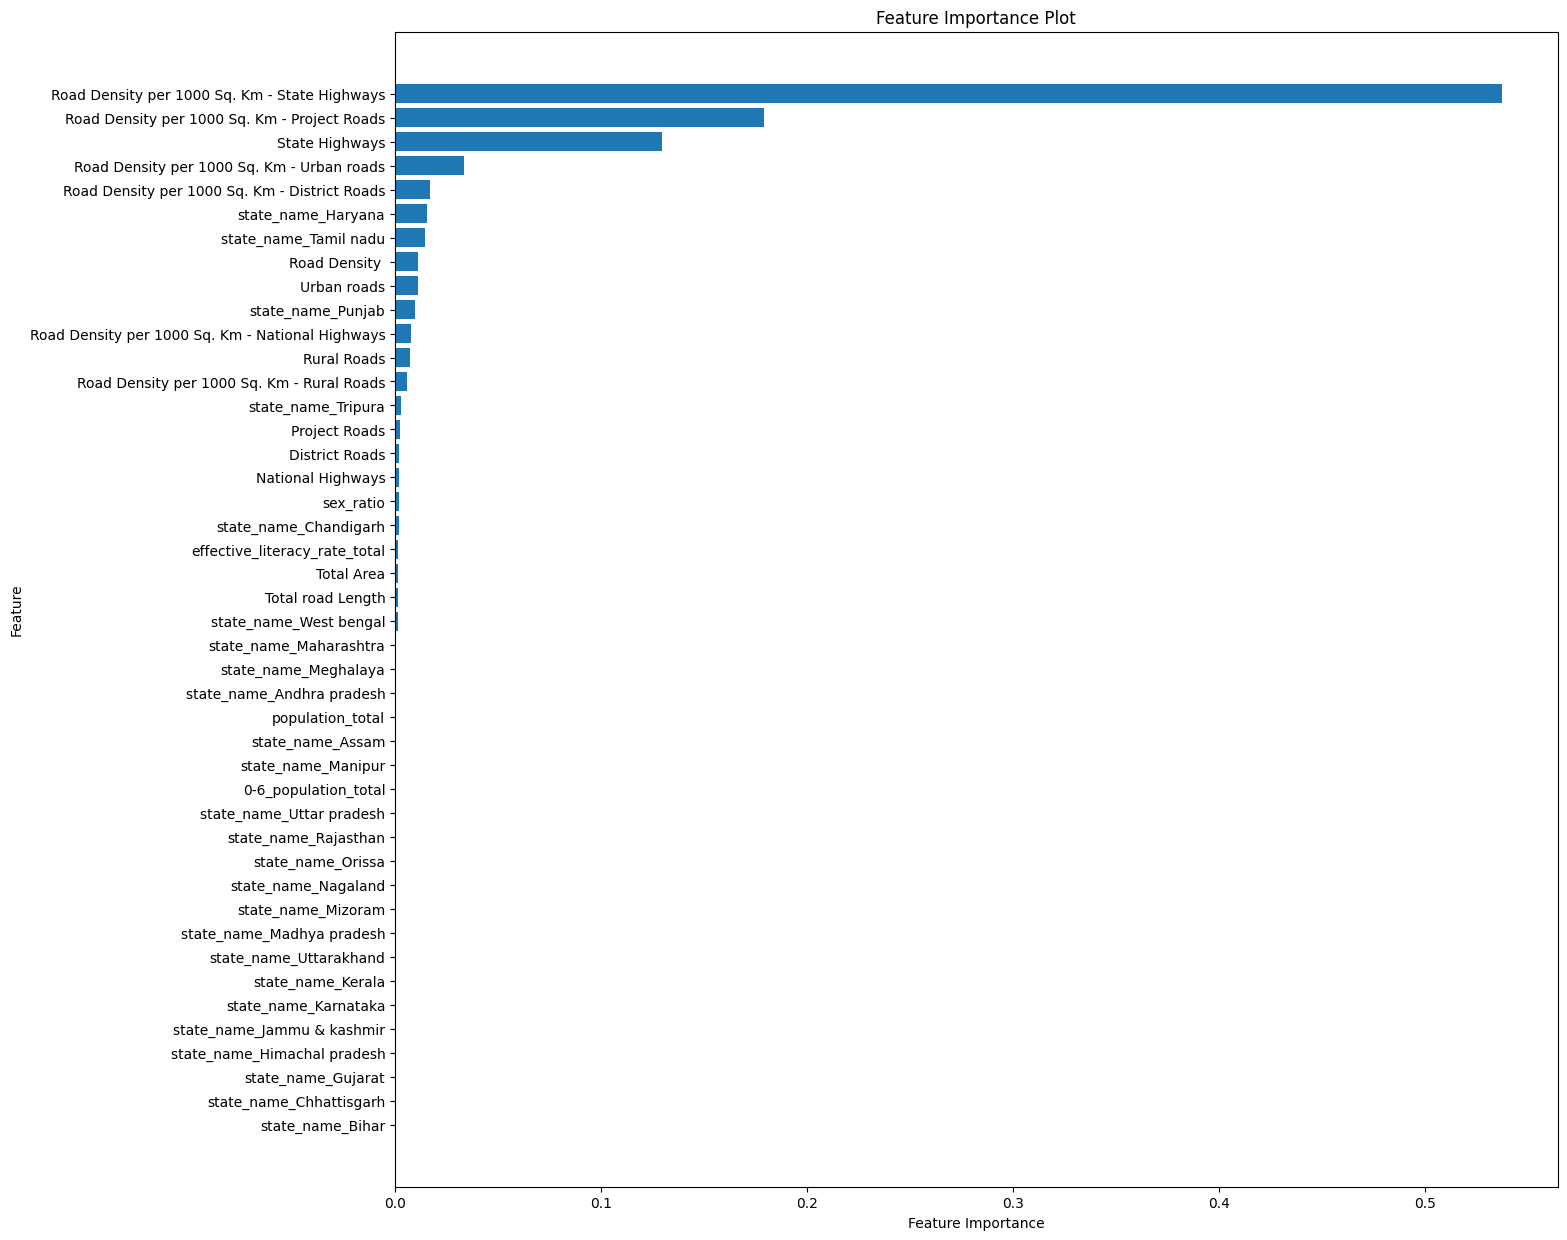

In [24]:
import matplotlib.pyplot as plt

feature_importances = gb_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

# Set a larger figure size
plt.figure(figsize=(15, 15))  # Adjust the width and height as needed

plt.barh(range(len(feature_names)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")

# Display the plot
plt.show()

##Predicted array

#Visuals

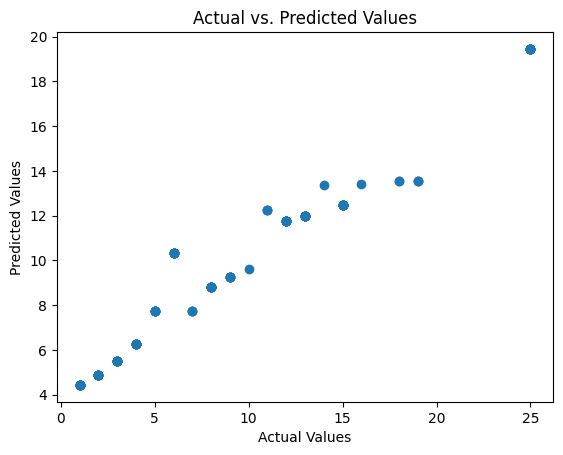

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


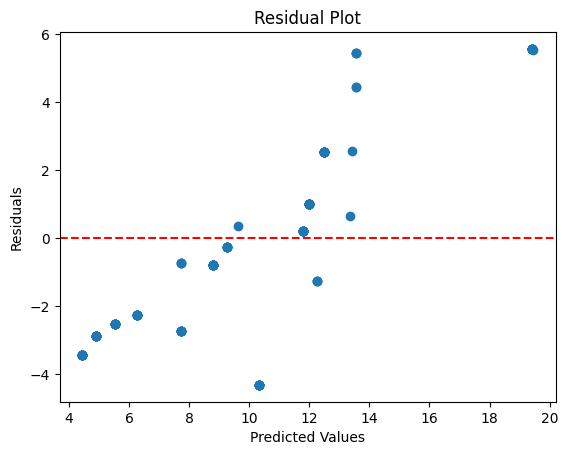

In [26]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()


## Learning Curve

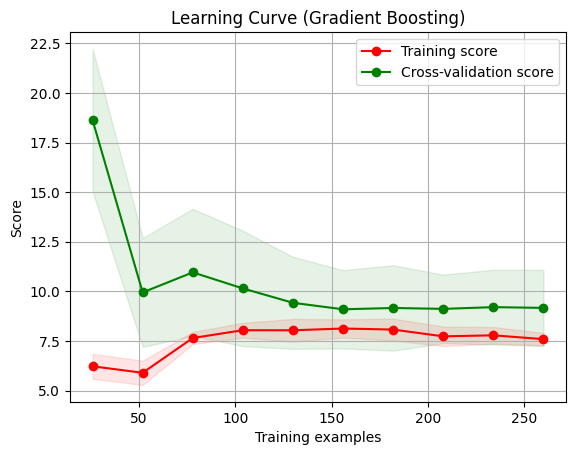

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define the model and parameters
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01)

# Plot the learning curve
plot_learning_curve(gb_model, "Learning Curve (Gradient Boosting)", X_train_custom_scaled, y_train, cv=5, n_jobs=-1)

# Show the plot
plt.show()
